<a href="https://colab.research.google.com/github/FreMeli/ASE_1/blob/main/Educacion_EDOS_M%C3%81S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns #importamos la librería
sns.set()#inicializamos le estilo de los gráficos
import pandas as pd
import numpy as np
import pylab as pl
from pandas.plotting import scatter_matrix 
from matplotlib import cm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import warnings

from google.colab import files 
import io

In [2]:
upload = files.upload()

Saving INEGI_EDO_ESCUELA.xls to INEGI_EDO_ESCUELA.xls


In [45]:
df_Escuela=pd.read_excel(io.BytesIO(upload["INEGI_EDO_ESCUELA.xls"]), header=0)#df con los datos de la población
df_Escuela

,AÑO,EDO,ESCOLARIDAD,TOTAL,HOMBRES,MUJERES
0,2000,Total,Total,10737,9442.0,1284.0
1,2000,Total,Sin escolaridad,1290,1118.0,170.0
2,2000,Total,Primaria incompleta,2034,1825.0,209.0
3,2000,Total,Primaria completa,2598,2345.0,253.0
4,2000,Total,Secundaria o equivalente,1986,1772.0,214.0
...,...,...,...,...,...,...
6199,2021,Zacatecas,Secundaria o equivalente,587,536.0,51.0
6200,2021,Zacatecas,Bachillerato o preparatoria incompleto,132,120.0,12.0
6201,2021,Zacatecas,Bachillerato o preparatoria completo,143,129.0,14.0
6202,2021,Zacatecas,Profesional,89,80.0,9.0


In [4]:
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns

In [46]:
df_Escuela.fillna(0, inplace=True)

In [6]:
df_Escuela.isna().sum()

AÑO            0
EDO            0
ESCOLARIDAD    0
TOTAL          0
HOMBRES        0
MUJERES        0
dtype: int64

In [7]:
df_Escuela['EDO'].unique()

array(['Total', 'Aguascalientes', 'Baja California',
       'Baja California Sur', 'Campeche', 'Coahuila de Zaragoza',
       'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Durango',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México',
       'Michoacán de Ocampo', 'Morelos', 'Nayarit', 'Nuevo León',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

In [47]:
# crear lista de estados
estados = ['Zacatecas', 'Guerrero', 'Colima', 'México', 'Oaxaca', 'Quintana Roo', 'Baja California Sur', 'Michoacán de Ocampo']

# filtrar el dataframe por los estados deseados
df_altos = df_Escuela[df_Escuela['EDO'].isin(estados)]
df_altos

,AÑO,EDO,ESCOLARIDAD,TOTAL,HOMBRES,MUJERES
20,2000,Baja California Sur,Total,28,23.0,5.0
21,2000,Baja California Sur,Sin escolaridad,1,1.0,0.0
22,2000,Baja California Sur,Primaria incompleta,4,3.0,1.0
23,2000,Baja California Sur,Primaria completa,11,8.0,3.0
24,2000,Baja California Sur,Secundaria o equivalente,4,4.0,0.0
...,...,...,...,...,...,...
6199,2021,Zacatecas,Secundaria o equivalente,587,536.0,51.0
6200,2021,Zacatecas,Bachillerato o preparatoria incompleto,132,120.0,12.0
6201,2021,Zacatecas,Bachillerato o preparatoria completo,143,129.0,14.0
6202,2021,Zacatecas,Profesional,89,80.0,9.0


In [48]:
# Creamos una máscara booleana para seleccionar las filas que queremos eliminar
mask = (df_altos['ESCOLARIDAD'] == 'Sin escolaridad')

# Aplicamos el método drop() para eliminar las filas seleccionadas por la máscara
df_altos = df_altos.drop(df_altos[mask].index)
df_altos

,AÑO,EDO,ESCOLARIDAD,TOTAL,HOMBRES,MUJERES
20,2000,Baja California Sur,Total,28,23.0,5.0
22,2000,Baja California Sur,Primaria incompleta,4,3.0,1.0
23,2000,Baja California Sur,Primaria completa,11,8.0,3.0
24,2000,Baja California Sur,Secundaria o equivalente,4,4.0,0.0
25,2000,Baja California Sur,Bachillerato o preparatoria completo,2,2.0,0.0
...,...,...,...,...,...,...
6199,2021,Zacatecas,Secundaria o equivalente,587,536.0,51.0
6200,2021,Zacatecas,Bachillerato o preparatoria incompleto,132,120.0,12.0
6201,2021,Zacatecas,Bachillerato o preparatoria completo,143,129.0,14.0
6202,2021,Zacatecas,Profesional,89,80.0,9.0


In [51]:
# Creamos una máscara booleana para seleccionar las filas que queremos eliminar
mask = (df_altos['ESCOLARIDAD'] == 'Total') 

# Aplicamos el método drop() para eliminar las filas seleccionadas por la máscara
df_altos = df_altos.drop(df_altos[mask].index)
df_altos

,AÑO,EDO,ESCOLARIDAD,TOTAL,HOMBRES,MUJERES
22,2000,Baja California Sur,Primaria incompleta,4,3.0,1.0
23,2000,Baja California Sur,Primaria completa,11,8.0,3.0
24,2000,Baja California Sur,Secundaria o equivalente,4,4.0,0.0
25,2000,Baja California Sur,Bachillerato o preparatoria completo,2,2.0,0.0
26,2000,Baja California Sur,Profesional,3,3.0,0.0
...,...,...,...,...,...,...
6199,2021,Zacatecas,Secundaria o equivalente,587,536.0,51.0
6200,2021,Zacatecas,Bachillerato o preparatoria incompleto,132,120.0,12.0
6201,2021,Zacatecas,Bachillerato o preparatoria completo,143,129.0,14.0
6202,2021,Zacatecas,Profesional,89,80.0,9.0


In [52]:
df_Zaca=df_altos.copy()
Zacatecas = ['Zacatecas']
# filtrar el dataframe por los estados deseados
df_Zaca = df_Zaca[df_Zaca['EDO'].isin(Zacatecas)]
df_Zaca

,AÑO,EDO,ESCOLARIDAD,TOTAL,HOMBRES,MUJERES
223,2000,Zacatecas,Primaria incompleta,34,33.0,1.0
224,2000,Zacatecas,Primaria completa,19,19.0,0.0
225,2000,Zacatecas,Secundaria o equivalente,9,9.0,0.0
226,2000,Zacatecas,Bachillerato o preparatoria completo,1,1.0,0.0
451,2001,Zacatecas,Primaria incompleta,32,30.0,2.0
...,...,...,...,...,...,...
6199,2021,Zacatecas,Secundaria o equivalente,587,536.0,51.0
6200,2021,Zacatecas,Bachillerato o preparatoria incompleto,132,120.0,12.0
6201,2021,Zacatecas,Bachillerato o preparatoria completo,143,129.0,14.0
6202,2021,Zacatecas,Profesional,89,80.0,9.0


In [53]:
df_Zaca.to_excel('df_Zaca.xlsx', index=False)

In [43]:
percentages

223     100.0
224     100.0
225     100.0
226     100.0
451     100.0
        ...  
6199    100.0
6200    100.0
6201    100.0
6202    100.0
6203    100.0
Name: TOTAL, Length: 144, dtype: float64

In [9]:
upload1 = files.upload()

Saving CONAPO_POB.xlsx to CONAPO_POB.xlsx


In [11]:
df_P=pd.read_excel(io.BytesIO(upload1["CONAPO_POB.xlsx"]), header=0)#df con los datos de la población
df_P

,AÑO,ENTIDAD,HOMBRES,MUJERES
0,2000,República Mexicana,48255807,49900635
1,2000,Aguascalientes,464024,488559
2,2000,Baja California,1247252,1211307
3,2000,Baja California Sur,219018,207555
4,2000,Campeche,350339,347621
...,...,...,...,...
721,2021,Tamaulipas,1812500,1852763
722,2021,Tlaxcala,676446,711366
723,2021,Veracruz,4156871,4408019
724,2021,Yucatán,1118236,1153344


In [12]:
df_Paltos = df_P[df_P['ENTIDAD'].isin(estados)]
df_Paltos

,AÑO,ENTIDAD,HOMBRES,MUJERES
3,2000,Baja California Sur,219018,207555
6,2000,Colima,269017,271833
12,2000,Guerrero,1520354,1595664
15,2000,México,6465740,6669296
20,2000,Oaxaca,1695155,1794529
...,...,...,...,...
705,2021,Guerrero,1773329,1889796
708,2021,México,8558176,8959067
713,2021,Oaxaca,1993958,2160814
716,2021,Quintana Roo,879330,863077


##MOVIENDOLE

In [33]:
df_altos

,AÑO,EDO,ESCOLARIDAD,TOTAL,HOMBRES,MUJERES
20,2000,Baja California Sur,Total,28,23.0,5.0
22,2000,Baja California Sur,Primaria incompleta,4,3.0,1.0
23,2000,Baja California Sur,Primaria completa,11,8.0,3.0
24,2000,Baja California Sur,Secundaria o equivalente,4,4.0,0.0
25,2000,Baja California Sur,Bachillerato o preparatoria completo,2,2.0,0.0
...,...,...,...,...,...,...
6199,2021,Zacatecas,Secundaria o equivalente,587,536.0,51.0
6200,2021,Zacatecas,Bachillerato o preparatoria incompleto,132,120.0,12.0
6201,2021,Zacatecas,Bachillerato o preparatoria completo,143,129.0,14.0
6202,2021,Zacatecas,Profesional,89,80.0,9.0


In [34]:
# creas un diccionario que asocia cada categoría con un número
escolaridad_dict = {
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria incompleta': 3,
    'Secundaria o equivalente': 4,
    'Bachillerato o preparatoria incompleto': 5,
    'Bachillerato o preparatoria completo': 6,
    'Profesional': 7,
    'Posgrado': 8,
}

# usas la función replace para asignar un número a cada categoría
df_altos['ESCOLARIDAD'] = df_altos['ESCOLARIDAD'].replace(escolaridad_dict)

<ipython-input-39-2f11a049ffde>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

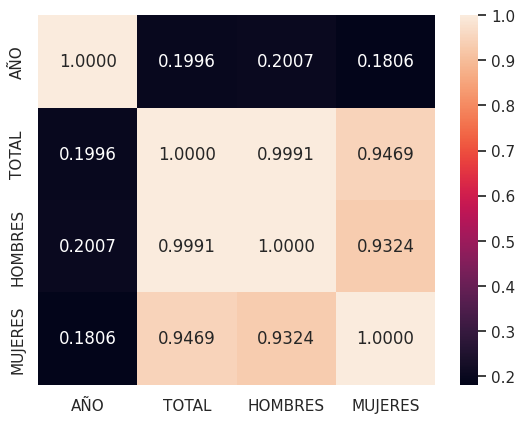

In [39]:
sns.heatmap(df_altos.corr(), annot=True, fmt='.4f')